## Importing Libraries & getting Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('dataset/Stock Headlines.csv', encoding='ISO-8859-1')

In [3]:
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4101 non-null   object
 1   Label   4101 non-null   int64 
 2   Top1    4101 non-null   object
 3   Top2    4101 non-null   object
 4   Top3    4101 non-null   object
 5   Top4    4101 non-null   object
 6   Top5    4101 non-null   object
 7   Top6    4101 non-null   object
 8   Top7    4101 non-null   object
 9   Top8    4101 non-null   object
 10  Top9    4101 non-null   object
 11  Top10   4101 non-null   object
 12  Top11   4101 non-null   object
 13  Top12   4101 non-null   object
 14  Top13   4101 non-null   object
 15  Top14   4101 non-null   object
 16  Top15   4101 non-null   object
 17  Top16   4101 non-null   object
 18  Top17   4101 non-null   object
 19  Top18   4101 non-null   object
 20  Top19   4101 non-null   object
 21  Top20   4101 non-null   object
 22  Top21   4101 non-null   

In [5]:
data.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

# EDA / Data Cleaning

--> Plotting bargraphs and countplots for numerical and categorical features respectively.

--> Removing unwanted columns

--> Handling NaN/missing values

--> Removing unwanted alphabet/special characters from the features

In [6]:
data.Label.value_counts()

1    2166
0    1935
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

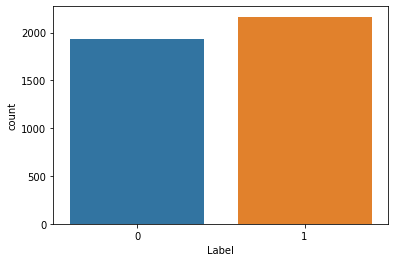

In [7]:
sns.countplot(x='Label' ,data=data)

## Handling Missing Values

In [8]:
data.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [9]:
data.dropna(inplace=True)
data.shape

(4098, 27)

## Performing Train-Test Split (time-series data)

In [10]:
data_ = data.copy() 
data_.reset_index(inplace=True)

In [11]:
train = data_[data_['Date'] < '20150101']
test = data_[data_['Date'] > '20141231']
print('Train-Size : {} '.format(train.shape))
print('Test-Size : {}'.format(test.shape))


Train-Size : (3972, 28) 
Test-Size : (378, 28)


In [12]:
train.columns

Index(['index', 'Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5',
       'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13',
       'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21',
       'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [13]:
y_train = train['Label']
train = train.iloc[: ,3:28]

y_test = test['Label']
test = test.iloc[:, 3:28]

# NLP

In [14]:
import nltk 
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer

## Remove Punctuation & Special characters from the text

In [15]:
train.replace(to_replace='[^a-zA-Z]' ,value=' ' ,regex=True ,inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

In [16]:
new_columns = [str(i) for i in range(0,25)]
train.columns = new_columns 
test.columns = new_columns

## Converting entire text to lowercase

In [17]:
for i in new_columns: 
    train[i] = train[i].str.lower()
    test[i] = test[i].str.lower()

## Joining all the columns

In [18]:
train_headlines = []
test_headlines =[]

for i in range(0,train.shape[0]):
    train_headlines.append(' '.join(str(x) for x in train.iloc[i ,0:25]))

for i in range(0, test.shape[0]):
    test_headlines.append(' '.join(str(x) for x in test.iloc[i, 0:25]))


In [19]:
train_headlines[69]

'wanchope double wins new admirers sibon swoops to dons  dismay dodds keeps rangers on high abbey national shake up music for a lazy lunch tyrant feeds on his divine right to be cruel gangland scandal keep your staff  send in the cleaners bad grrls live forever a l says golden goodbye to white c n ups its price for thomson travel vodafone and orange at odds imf warns chancellor spiralling spireites to call on clough redknapp homes in on   m kanoute big spenders lazio make   m loss wigan weighed down by jones tragedy in istanbul the home of cricket    and betting clean up in cricket must now follow  says wounded waugh background to a scam a fitting tribute to a doomed force the collected controversies of ken livingstone skating policemen still a long way to go for jimmy'

## Creating Corpus 

In [20]:
test_corpus = []
ps = PorterStemmer()

for i in range(0, len(test_headlines)):
    # tokenization --> breaking down the document i.e doc->sents->words )
    words = test_headlines[i].split()

    # stop-word removal
    words = [word for word in words if word not in set(
        stopwords.words('english'))]

    # Stemming --> convert diff forms of same word into single word
    words = [ps.stem(word) for word in words]

    # Joining the stemmed words
    headline = ' '.join(words)

    # corpus
    test_corpus.append(headline)


In [21]:
train_corpus =[]
ps = PorterStemmer()

for i in range(0, len(train_headlines)):
    # tokenization --> breaking down the document i.e doc->sents->words )
    words = train_headlines[i].split()

    # stop-word removal
    words = [word for word in words if word not in set(stopwords.words('english'))]

    # Stemming --> convert diff forms of same word into single word
    words = [ps.stem(word) for word in words]

    # Joining the stemmed words
    headline = ' '.join(words)

    # corpus 
    train_corpus.append(headline)


## Creating Bag of Words

In [22]:
from sklearn.feature_extraction.text import CountVectorizer  
cv = CountVectorizer(max_features=10000 ,ngram_range=(2,2))

In [23]:
X_train = cv.fit_transform(train_corpus).toarray()
X_test = cv.transform(test_corpus).toarray()

# Model Building

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression 

lr_model = LogisticRegression()
lr_model.fit(X_train ,y_train) 

y_predict_lr = lr_model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print('Accuracy of model : {}'.format(accuracy_score(y_test ,y_predict_lr)))
print('Classification Report of model : \n',classification_report(y_test, y_predict_lr))


Accuracy of model : 0.8597883597883598
Classification Report of model : 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       186
           1       0.87      0.85      0.86       192

    accuracy                           0.86       378
   macro avg       0.86      0.86      0.86       378
weighted avg       0.86      0.86      0.86       378



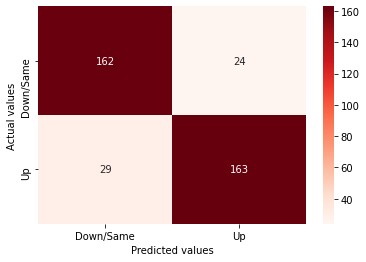

In [27]:
cfm_lr = confusion_matrix(y_test ,y_predict_lr)

sns.heatmap(data=cfm_lr ,annot=True ,cmap='Reds' ,xticklabels=['Down/Same' ,'Up'] ,yticklabels=['Down/Same' ,'Up'],fmt='.3g')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

## Random Forest 

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc_model.fit(X_train, y_train)

y_predict_rfc = rfc_model.predict(X_test)

In [29]:
print('Accuracy of model : {}'.format(accuracy_score(y_test, y_predict_rfc)))
print('Classification Report of model : \n',
      classification_report(y_test, y_predict_rfc))


Accuracy of model : 0.8544973544973545
Classification Report of model : 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       186
           1       0.83      0.89      0.86       192

    accuracy                           0.85       378
   macro avg       0.86      0.85      0.85       378
weighted avg       0.86      0.85      0.85       378



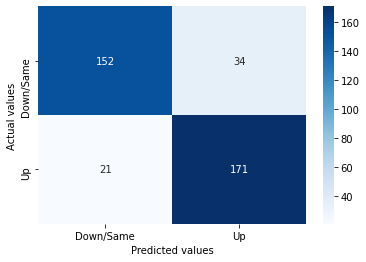

In [30]:
cfm_rfc = confusion_matrix(y_test, y_predict_rfc)

sns.heatmap(data=cfm_rfc, annot=True, cmap='Blues', xticklabels=['Down/Same', 'Up'], yticklabels=['Down/Same', 'Up'], fmt='.3g')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()


## Naive Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB

mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

y_predict_mnb = mnb_model.predict(X_test)

In [32]:
print('Accuracy of model : {}'.format(accuracy_score(y_test, y_predict_mnb)))
print('Classification Report of model : \n',
      classification_report(y_test, y_predict_mnb))


Accuracy of model : 0.8386243386243386
Classification Report of model : 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       186
           1       0.85      0.83      0.84       192

    accuracy                           0.84       378
   macro avg       0.84      0.84      0.84       378
weighted avg       0.84      0.84      0.84       378



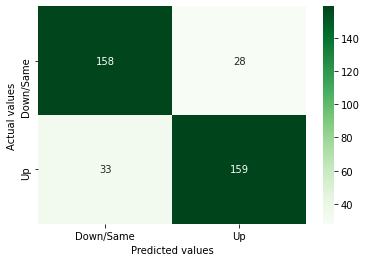

In [33]:
cfm_mnb = confusion_matrix(y_test, y_predict_mnb)

sns.heatmap(data=cfm_mnb, annot=True, cmap='Greens', xticklabels=['Down/Same', 'Up'], yticklabels=['Down/Same', 'Up'], fmt='.3g')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

# Model Evaluation

In [34]:
models = pd.DataFrame({
    'Model': ['Logistic-Regression', 'Random-Forest Classifier', 'Multinomial Naive-Bayes'],
    'Accuracy': [
        accuracy_score(y_test, y_predict_lr),
        accuracy_score(y_test, y_predict_rfc),
        accuracy_score(y_test, y_predict_mnb)
        ]
})

models.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy
0,Logistic-Regression,0.859788
1,Random-Forest Classifier,0.854497
2,Multinomial Naive-Bayes,0.838624
